<h1 style='color:#0099cc'> CONFIGURATION DU NOTEBOOK </h1>

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd # manipulation et analyse de données
import numpy as np # calculs numériques
import matplotlib.pyplot as plt # visualisation de données
import seaborn as sns # visualisation de données avancée
from sklearn.preprocessing import StandardScaler # normalisation des données
from sklearn.cluster import KMeans # algorithme de clustering K-Means
from sklearn.decomposition import PCA # analyse en composantes principales
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # métriques d'évaluation de clustering
from sklearn.model_selection import KFold # validation croisée
import joblib	 # sauvegarde et chargement de modèles
import pickle	 # sérialisation d'objets Python
import warnings # gestion des avertissements
warnings.filterwarnings("ignore") 

# Configuration de l'affichage
plt.style.use("seaborn-v0_8-darkgrid") # style de graphique
sns.set_palette("husl")  # palette de couleurs
pd.set_option("display.max_columns", None)  # afficher toutes les colonnes
pd.set_option("display.float_format", lambda x: '%.3f' % x)  # format d'affichage des nombres flottants

<h1 style='color:#0099cc'> PRETRAITEMENT DU JEU DE DONNEES </h1>

In [ ]:
# Chargement du dataset
df = pd.read_csv("winequality-white.csv", sep=';', decimal=".") # lire le fichier CSV avec le bon séparateur et format décimal

# Affichage des informations générales
print("=" * 80)
print("INFORMATIONS GENERALES SUR LE DATASET")
print("=" * 80)
print(f"\nDimensions du dataset : {df.shape}")
print(f"Nombre de lignes : {df.shape[0]}") # affiche le nombre de lignes
print(f"Nombre de colonnes : {df.shape[1]}") # affiche le nombre de colonnes

print("\n--- Types des variables ---")
print(df.dtypes) # affiche les types des variables

print("\n--- Premières lignes ---")
df.head() # affiche les premières lignes du dataset

INFORMATIONS GENERALES SUR LE DATASET

Dimensions du dataset : (4898, 12)
Nombre de lignes : 4898
Nombre de colonnes : 12

--- Types des variables ---
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

--- Premières lignes ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6
1,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6
2,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6
3,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6
4,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6


<h2 style="text-align:center; color:gold;">INTERPRETATIONS</h2>

<ul>
  <li>Toutes les variables sont numériques.</li>
  <li>Les variables ont des grandeurs disparates.</li>
  <li>Par conséquant, une standardisation ou une normalisation est nécessaire!</li>
  <li>Nous standardiserons les valeurs (plus adapté au k-means). <p>z = (x − &mu;) / &sigma;</p>
  </li>
</ul>




In [ ]:
# Statistiques descriptives
print("\n--- Statistiques descriptives ---")
df.describe() # affiche les statistiques descriptives du dataset


--- Statistiques descriptives ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [ ]:
# Vérification des valeurs manquantes
print("\n--- Valeurs manquantes ---")
missing_values = df.isnull().sum()  # calculer le nombre de valeurs manquantes par colonne
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Aucune valeur manquante") # afficher les colonnes avec des valeurs manquantes ou indiquer qu'il n'y en a pas

# Vérification des doublons
print(f"\n--- Nombre de doublons: {df.duplicated().sum()} ---") # afficher le nombre de doublons dans le dataset


--- Valeurs manquantes ---
Aucune valeur manquante

--- Nombre de doublons: 937 ---


<h2 style="text-align:center; color:gold;">INTERPRETATIONS</h2>

<ul>
  <li>Aucune gestion de valeur manquante n'est nécessaire.</li>
  <li>Les doublons (937) devront être supprimés.</li>
</ul>

In [ ]:
# Suppression des doublons
df_clean = df.drop_duplicates() # supprimer les doublons
print(f"Lignes après suppression des doublons : {len(df_clean)}") # afficher le nombre de lignes après suppression des doublons

# Séparation des features et de la variable cible (pour analyse ultérieure)
X = df_clean.drop("quality", axis=1) # séparer les features
y = df_clean["quality"] # séparer la variable cible

# Liste des features
feature_names = X.columns.tolist() # obtenir les noms des features
print(f"\nFeatures utilisées pour le clustering: {feature_names}") # afficher les noms des features utilisées pour le clustering

Lignes après suppression des doublons: 3961

Features utilisées pour le clustering: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [8]:
# Détection et traitement des outliers (méthode IQR)
def detect_outliers_iqr(data, threshold=1.5):
    """
    Détecte les outliers en utilisant la méthode IQR
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outliers_mask = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
    return outliers_mask

# Identification des outliers
outliers_mask = detect_outliers_iqr(X, threshold=3.0)
print(f"\nNombre d'outliers détectés (IQR threshold=3.0): {outliers_mask.sum()}")
print(f"Pourcentage d'outliers: {outliers_mask.sum()/len(X)*100:.2f}%")

# Conservation de tous les points pour l'analyse initiale
X_with_outliers = X.copy()
X_no_outliers = X[~outliers_mask]
y_no_outliers = y[~outliers_mask]


Nombre d'outliers détectés (IQR threshold=3.0): 163
Pourcentage d'outliers: 4.12%


<h2 style="text-align:center; color:gold;">REMARQUES</h2>

<ul>
  <li>Dans ce notebook, nous conserverons les outliers en supposant 
  qu'ils sont des mesures réelles et non des erreurs de mesures.</li>
  <li>Par contre, dans l'interface utilisateur streamlit de ce projet,
  l'utilisateur pourra choisir de supprimer les outliers ou non à travers un bouton.</li>
</ul>

In [ ]:
# Standardisation des données
scaler = StandardScaler() # initialisation du standardiseur
X_scaled = scaler.fit_transform(X) # appliquer la standardisation
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names, index=X.index) # créer un DataFrame avec les données standardisées

print("Données après standardisation (5 premières lignes):")
X_scaled_df.head() # affiche les premières lignes des données standardisées	

Données après standardisation (5 premières lignes):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.185,-0.102,0.210,3.042,-0.039,0.588,0.761,2.483,-1.290,-0.355,-1.470
1,-0.622,0.188,0.046,-0.888,0.134,-1.214,-0.120,0.072,0.690,-0.003,-0.895
2,1.454,-0.005,0.536,0.203,0.177,-0.284,-0.932,0.451,0.426,-0.444,-0.402
3,0.416,-0.489,-0.117,0.532,0.524,0.704,1.132,0.623,-0.036,-0.796,-0.566
6,-0.738,0.382,-1.424,0.223,-0.039,-0.284,-0.028,0.382,-0.102,-0.179,-0.813


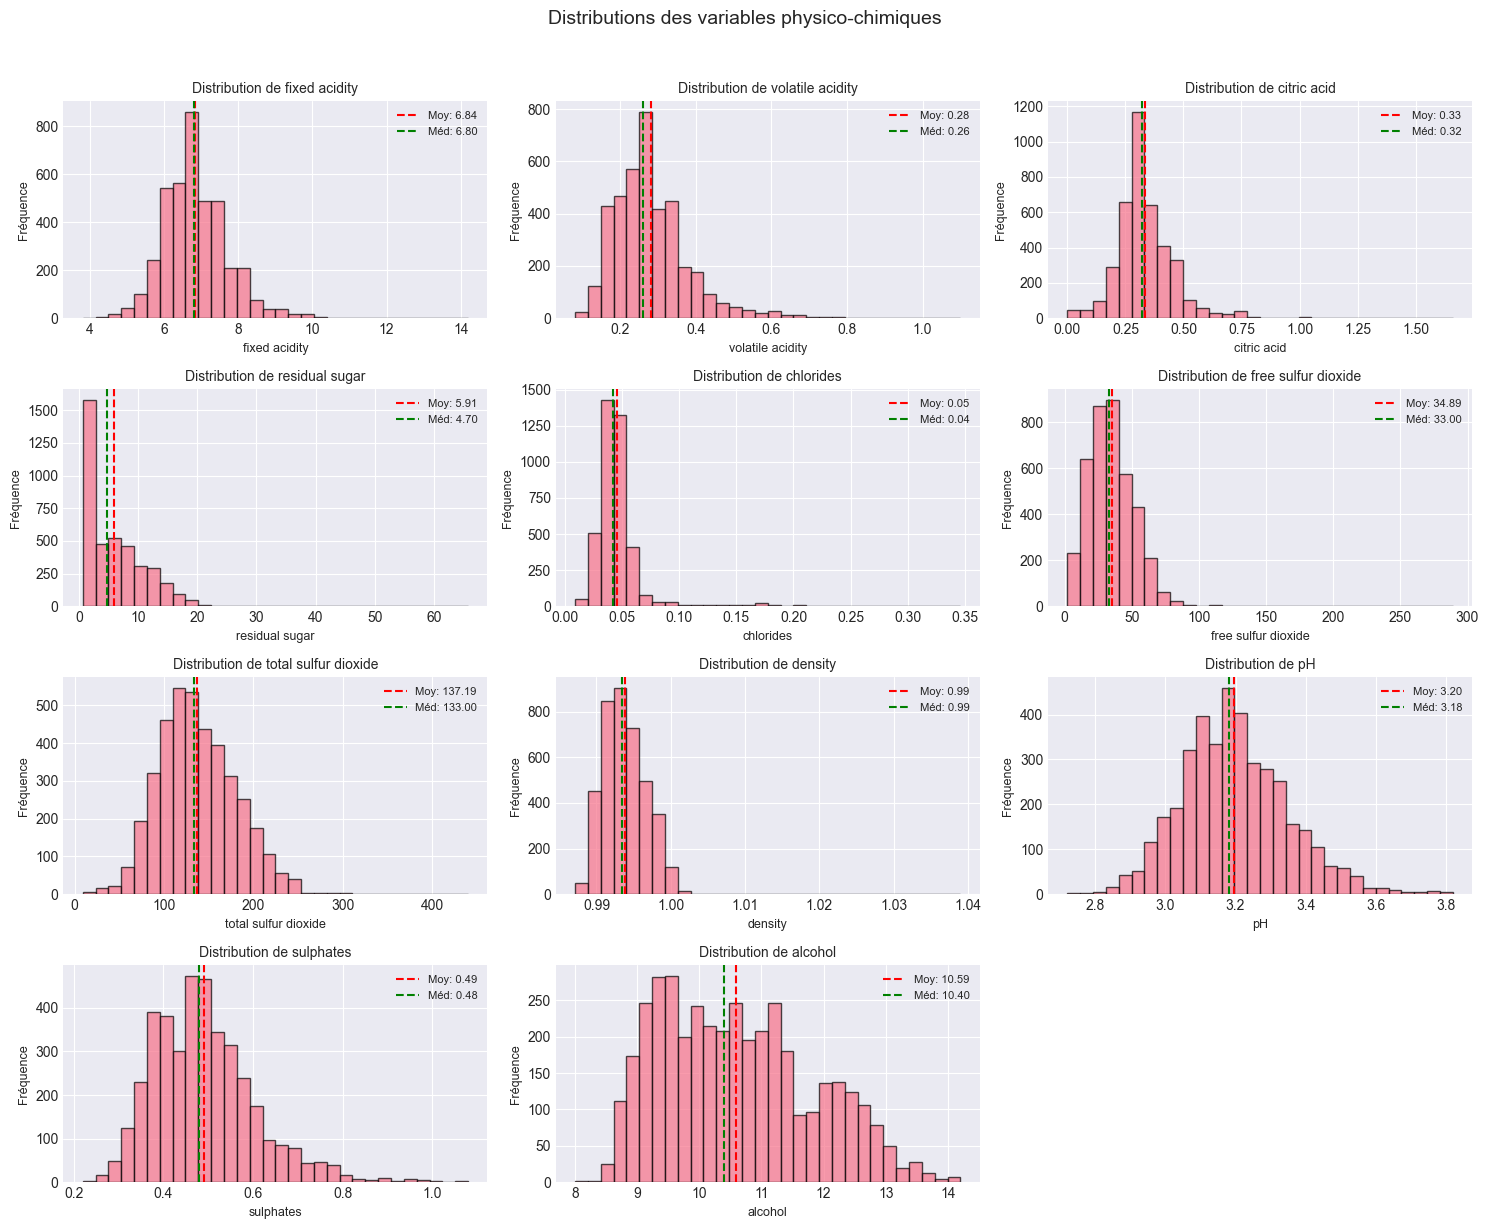

In [ ]:
# Visualisation des distributions
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(feature_names):
    axes[idx].hist(X[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution de {col}', fontsize=10)
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Fréquence', fontsize=9)
    
    # Ajout de statistiques sur le graphique
    mean_val = X[col].mean() # calculer la moyenne
    median_val = X[col].median() # calculer la médiane
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Moy: {mean_val:.2f}') # ligne verticale pour la moyenne
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Méd: {median_val:.2f}') # ligne verticale pour la médiane
    axes[idx].legend(fontsize=8) # afficher la légende

# Masquer le dernier subplot vide
if len(feature_names) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('Distributions des variables physico-chimiques', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

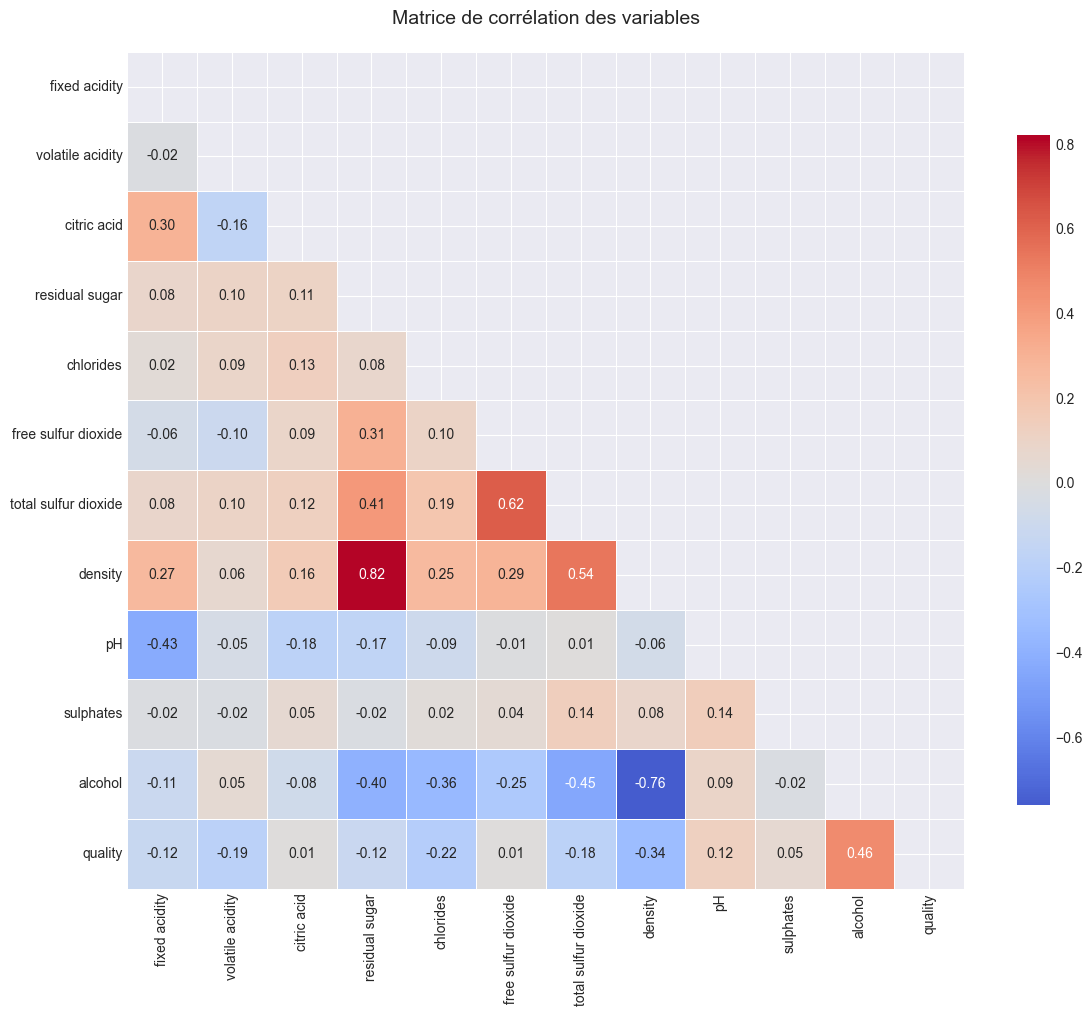


--- Corrélations avec la qualité ---
quality                 1.000
alcohol                 0.463
pH                      0.124
sulphates               0.053
free sulfur dioxide     0.011
citric acid             0.007
residual sugar         -0.117
fixed acidity          -0.125
total sulfur dioxide   -0.183
volatile acidity       -0.191
chlorides              -0.218
density                -0.338
Name: quality, dtype: float64


In [ ]:
# Calcul et visualisation de la matrice de corrélation
corr_matrix = df_clean.corr() # calculer la matrice de corrélation

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation des variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Corrélations avec la qualité
print("\n--- Corrélations avec la qualité ---")
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print(quality_corr)

<h2 style="text-align:center; color:gold;">VARIABLES LES PLUS CORRELEES</h2>

<ul>
  <li>La variable la plus corrélée à la qualité du vin "quality" est "alcohol", suivie de "density".</li>
  <li>Les variables les plus corrélées entre elles sont: "density" et "residual sugar" 0.82 ; "density" et "alcohol" -0.76</li>
</ul>

<h1 style='color:#0099cc'> PCA </h1>

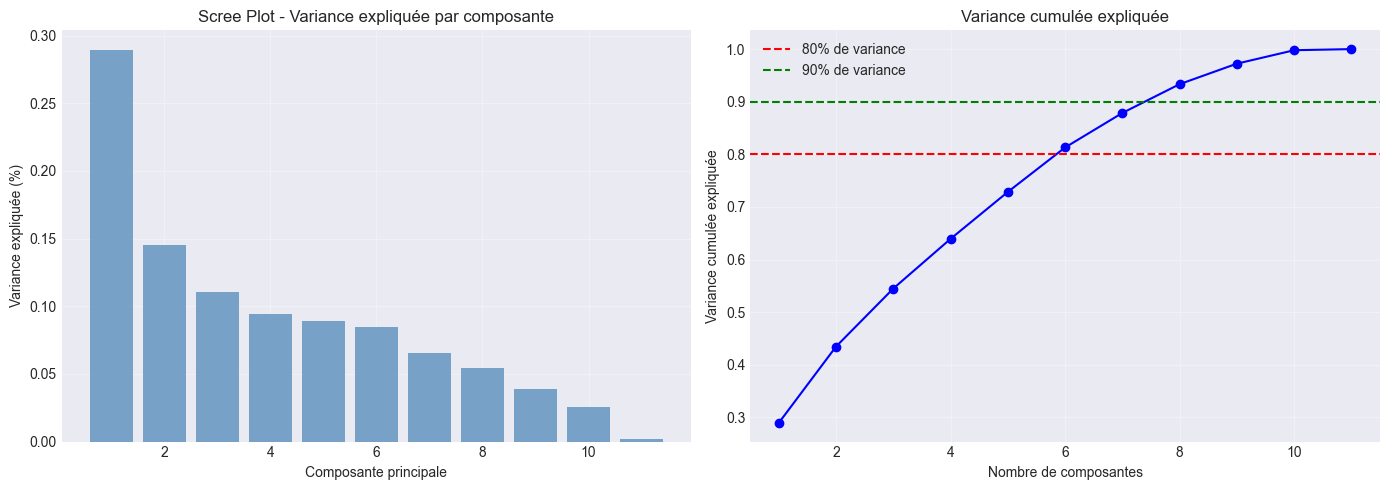

Variance expliquée par les 2 premières composantes: 43.45%
Nombre de composantes pour 80% de variance: 6
Nombre de composantes pour 90% de variance: 8


In [ ]:
# PCA pour visualisation
pca_viz = PCA(n_components=2) # initialisation de la PCA pour 2 composantes
X_pca = pca_viz.fit_transform(X_scaled) # appliquer la PCA

# Variance expliquée
pca_full = PCA() # initialisation de la PCA complète
pca_full.fit(X_scaled) # ajuster la PCA sur les données standardisées
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_) # calculer la variance cumulée expliquée

# Visualisation de la variance expliquée
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Composante principale')
axes[0].set_ylabel('Variance expliquée (%)')
axes[0].set_title('Scree Plot - Variance expliquée par composante')
axes[0].grid(True, alpha=0.3)

# Variance cumulée
axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-')
axes[1].axhline(y=0.8, color='r', linestyle='--', label='80% de variance')
axes[1].axhline(y=0.9, color='g', linestyle='--', label='90% de variance')
axes[1].set_xlabel('Nombre de composantes')
axes[1].set_ylabel('Variance cumulée expliquée')
axes[1].set_title('Variance cumulée expliquée')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Variance expliquée par les 2 premières composantes: {pca_viz.explained_variance_ratio_.sum():.2%}")
print(f"Nombre de composantes pour 80% de variance: {np.argmax(cumsum_var >= 0.8) + 1}")
print(f"Nombre de composantes pour 90% de variance: {np.argmax(cumsum_var >= 0.9) + 1}")

<h1 style='color:#0099cc'> CLUSTERING PAR K-MEANS </h1>

<h3 style='color:gold'> RECHERCHE DE LA MEILLEURE VALEUR DE K </h3>

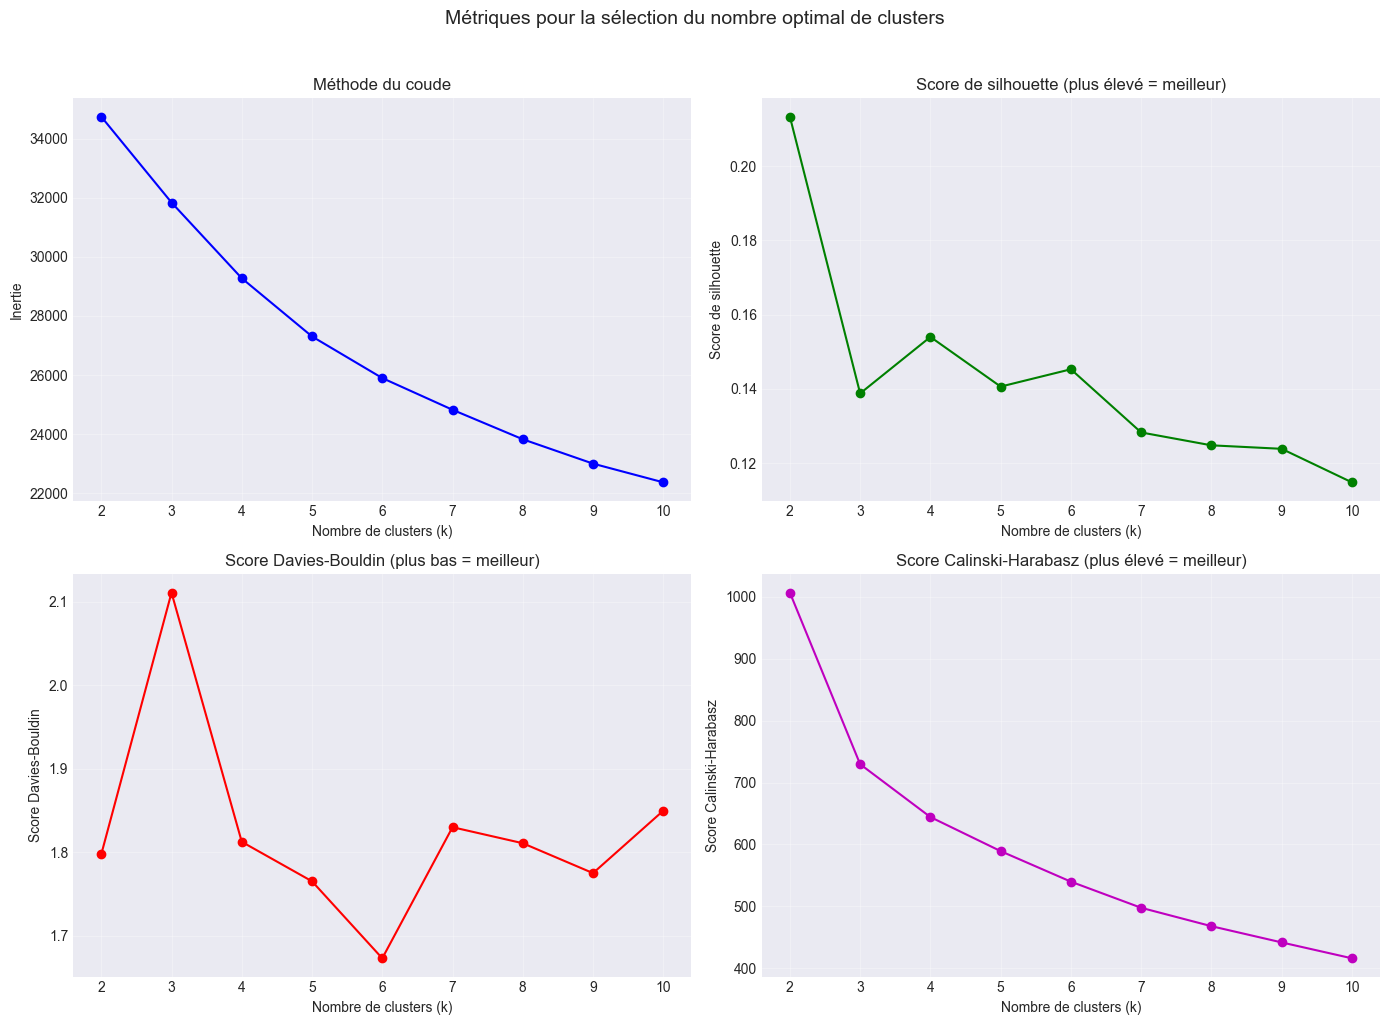


K optimal selon le score de silhouette: 2
Score de silhouette maximal: 0.213


In [15]:
# Calcul de l'inertie pour différentes valeurs de k
k_range = range(2, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

# Visualisation des métriques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Courbe du coude
axes[0, 0].plot(k_range, inertias, 'bo-')
axes[0, 0].set_xlabel('Nombre de clusters (k)')
axes[0, 0].set_ylabel('Inertie')
axes[0, 0].set_title('Méthode du coude')
axes[0, 0].grid(True, alpha=0.3)

# Score de silhouette
axes[0, 1].plot(k_range, silhouette_scores, 'go-')
axes[0, 1].set_xlabel('Nombre de clusters (k)')
axes[0, 1].set_ylabel('Score de silhouette')
axes[0, 1].set_title('Score de silhouette (plus élevé = meilleur)')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin Score
axes[1, 0].plot(k_range, davies_bouldin_scores, 'ro-')
axes[1, 0].set_xlabel('Nombre de clusters (k)')
axes[1, 0].set_ylabel('Score Davies-Bouldin')
axes[1, 0].set_title('Score Davies-Bouldin (plus bas = meilleur)')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz Score
axes[1, 1].plot(k_range, calinski_harabasz_scores, 'mo-')
axes[1, 1].set_xlabel('Nombre de clusters (k)')
axes[1, 1].set_ylabel('Score Calinski-Harabasz')
axes[1, 1].set_title('Score Calinski-Harabasz (plus élevé = meilleur)')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Métriques pour la sélection du nombre optimal de clusters', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Identification du k optimal
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nK optimal selon le score de silhouette: {optimal_k_silhouette}")
print(f"Score de silhouette maximal: {max(silhouette_scores):.3f}")

In [17]:
def cross_validate_kmeans(X, k_range, n_splits=5):
    """
    Validation croisée pour sélectionner le meilleur k
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    results = {k: {'silhouette': [], 'davies_bouldin': [], 'calinski': []} 
               for k in k_range}
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_train)
            
            # Prédiction sur le set de validation
            val_labels = kmeans.predict(X_val)
            
            # Calcul des métriques
            if len(np.unique(val_labels)) > 1:  # Vérifier qu'on a au moins 2 clusters
                sil_score = silhouette_score(X_val, val_labels)
                db_score = davies_bouldin_score(X_val, val_labels)
                ch_score = calinski_harabasz_score(X_val, val_labels)
                
                results[k]['silhouette'].append(sil_score)
                results[k]['davies_bouldin'].append(db_score)
                results[k]['calinski'].append(ch_score)
    
    # Calcul des moyennes
    cv_results = {}
    for k in k_range:
        cv_results[k] = {
            'silhouette_mean': np.mean(results[k]['silhouette']),
            'silhouette_std': np.std(results[k]['silhouette']),
            'davies_bouldin_mean': np.mean(results[k]['davies_bouldin']),
            'davies_bouldin_std': np.std(results[k]['davies_bouldin']),
            'calinski_mean': np.mean(results[k]['calinski']),
            'calinski_std': np.std(results[k]['calinski'])
        }
    
    return cv_results

# Exécution de la validation croisée
print("Validation croisée en cours...")
cv_results = cross_validate_kmeans(X_scaled, k_range, n_splits=5)

# Affichage des résultats
cv_df = pd.DataFrame(cv_results).T
print("\n--- Résultats de la validation croisée ---")
print(cv_df)

# Sélection du meilleur k
best_k = cv_df['silhouette_mean'].idxmax()
print(f"\nMeilleur k selon la validation croisée (silhouette): {best_k}")
print(f"Score de silhouette moyen: {cv_df.loc[best_k, 'silhouette_mean']:.3f} "
      f"(± {cv_df.loc[best_k, 'silhouette_std']:.3f})")

Validation croisée en cours...

--- Résultats de la validation croisée ---
    silhouette_mean  silhouette_std  davies_bouldin_mean  davies_bouldin_std  \
2             0.213           0.009                1.792               0.043   
3             0.138           0.004                2.106               0.046   
4             0.153           0.005                1.807               0.036   
5             0.139           0.005                1.760               0.031   
6             0.142           0.005                1.690               0.031   
7             0.125           0.007                1.825               0.072   
8             0.122           0.005                1.816               0.032   
9             0.119           0.005                1.793               0.042   
10            0.108           0.004                1.859               0.028   

    calinski_mean  calinski_std  
2         201.640         8.635  
3         145.952         2.393  
4         129.093     

<h2 style="text-align:center; color:gold;">CHOIX DE K</h2>

<ul>
  <li>k = 2 semble être bon sur l'ensemble des scores.</li>
  <li>Nous prendrons k = 2</li>
</ul>

<h3 style='color:gold'> ENTRAINEMENT DU MODELE </h3>

In [18]:
# Entraînement avec le k optimal
optimal_k = best_k
print(f"Entrainement du K-means avec k={optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20, max_iter=300)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Ajout des labels au dataframe
df_clustered = df_clean.copy()
df_clustered['cluster'] = cluster_labels

print(f"\nNombre de points par cluster:")
print(df_clustered['cluster'].value_counts().sort_index())

Entrainement du K-means avec k=2

Nombre de points par cluster:
cluster
0    2484
1    1477
Name: count, dtype: int64


<h1 style='color:#0099cc'> EVALUATION ET INTERPRETATION </h1>

In [19]:
# Calcul des métriques finales
final_silhouette = silhouette_score(X_scaled, cluster_labels)
final_davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
final_calinski = calinski_harabasz_score(X_scaled, cluster_labels)

print("=" * 60)
print("METRIQUES DE QUALITE DU CLUSTERING")
print("=" * 60)
print(f"Score de silhouette: {final_silhouette:.3f}")
print(f"Score Davies-Bouldin: {final_davies_bouldin:.3f}")
print(f"Score Calinski-Harabasz: {final_calinski:.3f}")

METRIQUES DE QUALITE DU CLUSTERING
Score de silhouette: 0.213
Score Davies-Bouldin: 1.797
Score Calinski-Harabasz: 1006.735



--- Moyennes des variables par cluster ---
         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0                6.749             0.276        0.316           3.418   
1                6.991             0.289        0.366          10.114   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
cluster                                                                        
0            0.040               28.295               116.083    0.992 3.213   
1            0.056               45.978               172.698    0.997 3.166   

         sulphates  alcohol  quality  
cluster                               
0            0.486   11.170    6.041  
1            0.498    9.613    5.541  


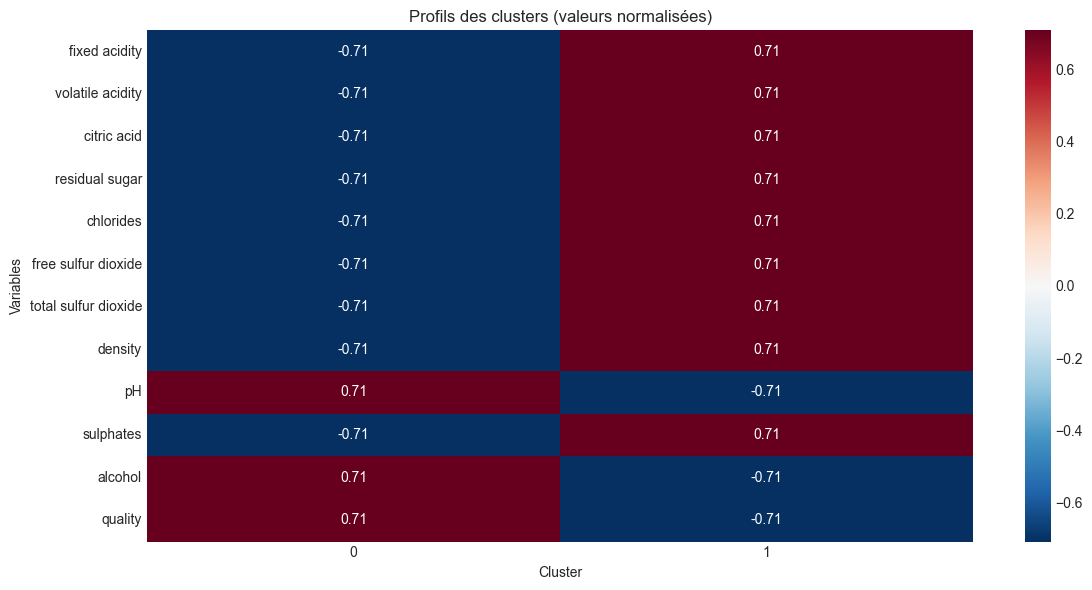

In [20]:
# Statistiques par cluster
cluster_summary = df_clustered.groupby('cluster').agg(['mean', 'std'])

print("\n--- Moyennes des variables par cluster ---")
cluster_means = df_clustered.groupby('cluster').mean()
print(cluster_means)

# Heatmap des moyennes normalisées
plt.figure(figsize=(12, 6))
cluster_means_norm = (cluster_means - cluster_means.mean()) / cluster_means.std()
sns.heatmap(cluster_means_norm.T, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Profils des clusters (valeurs normalisées)')
plt.xlabel('Cluster')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


--- Qualité moyenne par cluster ---
         mean   std  count
cluster                   
0       6.040 0.920   2484
1       5.540 0.740   1477


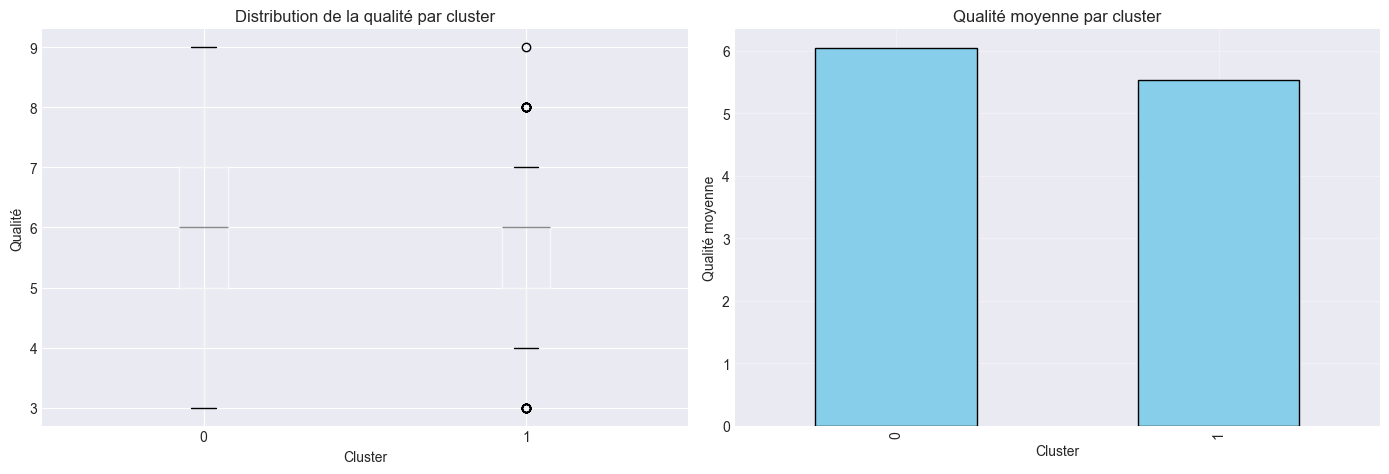

In [21]:
# Analyse de la qualité par cluster
quality_by_cluster = df_clustered.groupby('cluster')['quality'].agg(['mean', 'std', 'count'])
quality_by_cluster['mean'] = quality_by_cluster['mean'].round(2)
quality_by_cluster['std'] = quality_by_cluster['std'].round(2)

print("\n--- Qualité moyenne par cluster ---")
print(quality_by_cluster)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot qualité par cluster
df_clustered.boxplot(column='quality', by='cluster', ax=axes[0])
axes[0].set_title('Distribution de la qualité par cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Qualité')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Barplot qualité moyenne
quality_by_cluster['mean'].plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Qualité moyenne par cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Qualité moyenne')
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()

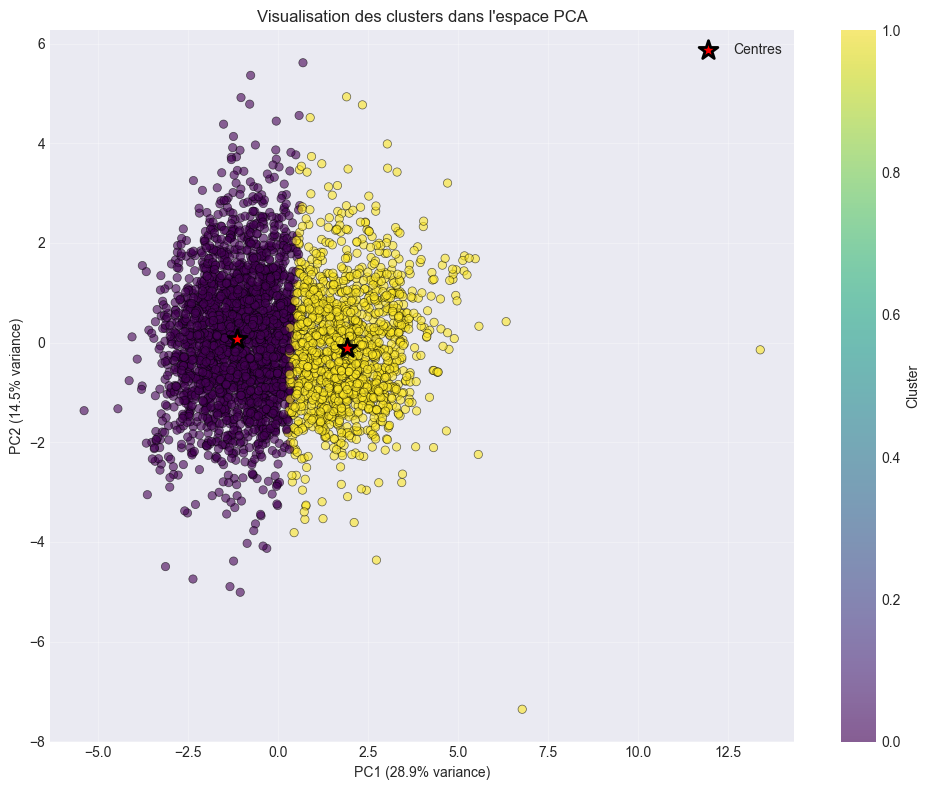

In [22]:
# Visualisation des clusters dans l'espace PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')

# Ajout des centres des clusters projetés
centers_pca = pca_viz.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, 
           edgecolors='black', linewidth=2, marker='*', label='Centres')

plt.xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')
plt.title("Visualisation des clusters dans l'espace PCA")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
# Analyse détaillée de chaque cluster
for cluster_id in range(optimal_k):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*60}")
    
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    
    print(f"Taille: {len(cluster_data)} vins ({len(cluster_data)/len(df_clustered)*100:.1f}%)")
    print(f"Qualité moyenne: {cluster_data['quality'].mean():.2f} (± {cluster_data['quality'].std():.2f})")
    
    # Variables caractéristiques
    cluster_mean = cluster_data[feature_names].mean()
    overall_mean = df_clustered[feature_names].mean()
    diff_percent = ((cluster_mean - overall_mean) / overall_mean * 100).sort_values()
    
    print("\nVariables les plus distinctives (% différence vs moyenne globale):")
    print("Variables sous la moyenne:")
    for var in diff_percent.head(3).index:
        print(f"  - {var}: {diff_percent[var]:.1f}%")
    
    print("Variables au-dessus de la moyenne:")
    for var in diff_percent.tail(3).index:
        print(f"  - {var}: {diff_percent[var]:.1f}%")


CLUSTER 0
Taille: 2484 vins (62.7%)
Qualité moyenne: 6.04 (± 0.92)

Variables les plus distinctives (% différence vs moyenne globale):
Variables sous la moyenne:
  - residual sugar: -42.2%
  - free sulfur dioxide: -18.9%
  - total sulfur dioxide: -15.4%
Variables au-dessus de la moyenne:
  - density: -0.2%
  - pH: 0.5%
  - alcohol: 5.5%

CLUSTER 1
Taille: 1477 vins (37.3%)
Qualité moyenne: 5.54 (± 0.74)

Variables les plus distinctives (% différence vs moyenne globale):
Variables sous la moyenne:
  - alcohol: -9.2%
  - pH: -0.9%
  - density: 0.3%
Variables au-dessus de la moyenne:
  - total sulfur dioxide: 25.9%
  - free sulfur dioxide: 31.8%
  - residual sugar: 71.0%


<h1 style='color:#0099cc'> SAUVEGARDE DU MEILLEUR MODELE </h1>

In [25]:
# Sauvegarde avec joblib
joblib.dump(kmeans_final, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("Modèle sauvegardé avec joblib: kmeans_model.joblib")
print("Scaler sauvegardé avec joblib: scaler.joblib")

# Sauvegarde avec pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Modèle sauvegardé avec pickle: kmeans_model.pkl")
print("Scaler sauvegardé avec pickle: scaler.pkl")

# Sauvegarde des métadonnées
metadata = {
    'optimal_k': optimal_k,
    'features': feature_names,
    'silhouette_score': final_silhouette,
    'davies_bouldin_score': final_davies_bouldin,
    'calinski_harabasz_score': final_calinski,
    'n_samples_trained': len(X_scaled)
}

with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)
print("Métadonnées sauvegardées: model_metadata.pkl")

Modèle sauvegardé avec joblib: kmeans_model.joblib
Scaler sauvegardé avec joblib: scaler.joblib
Modèle sauvegardé avec pickle: kmeans_model.pkl
Scaler sauvegardé avec pickle: scaler.pkl
Métadonnées sauvegardées: model_metadata.pkl


<h1 style='color:#0099cc'> PREDICTION ET TEST </h1>

In [26]:
# Test de chargement
loaded_model = joblib.load('kmeans_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

# Test sur un échantillon
sample = X.iloc[:5]
sample_scaled = loaded_scaler.transform(sample)
predictions = loaded_model.predict(sample_scaled)

print("\n--- Test de prédiction ---")
print("Échantillon de test (5 premiers vins):")
for i, pred in enumerate(predictions):
    print(f"Vin {i+1}: Cluster {pred}")


--- Test de prédiction ---
Échantillon de test (5 premiers vins):
Vin 1: Cluster 1
Vin 2: Cluster 0
Vin 3: Cluster 0
Vin 4: Cluster 1
Vin 5: Cluster 0


<h1 style='color:#0099cc'> SYNTHESE DE L'ANALYSE</h1>

In [27]:
print("\n" + "="*80)
print("SYNTHESE DE L'ANALYSE")
print("="*80)

print(f"""
1. DONNEES:
   - Dataset: {len(df_clean)} vins blancs avec 11 caractéristiques physico-chimiques
   - Aucune valeur manquante, {df.duplicated().sum()} doublons supprimés
   
2. CLUSTERING:
   - Nombre optimal de clusters: {optimal_k} (validation croisée)
   - Score de silhouette: {final_silhouette:.3f}
   - Les clusters représentent des profils chimiques distincts.
   
3. INSIGHTS PRINCIPAUX:
   - Les variables les plus discriminantes sont : {', '.join(quality_corr.abs().nlargest(3).index.tolist())}
   - Les clusters montrent des différences significatives en termes de qualité.
   - Certains profils chimiques sont associés à des vins de meilleure qualité.
   
4. FICHIERS GENERES:
   - kmeans_model.joblib / .pkl : Modèle K-means entraîné
   - scaler.joblib / .pkl : StandardScaler pour prétraitement
   - model_metadata.pkl : Métadonnées du modèle
""")


SYNTHESE DE L'ANALYSE

1. DONNEES:
   - Dataset: 3961 vins blancs avec 11 caractéristiques physico-chimiques
   - Aucune valeur manquante, 937 doublons supprimés

2. CLUSTERING:
   - Nombre optimal de clusters: 2 (validation croisée)
   - Score de silhouette: 0.213
   - Les clusters représentent des profils chimiques distincts.

3. INSIGHTS PRINCIPAUX:
   - Les variables les plus discriminantes sont : quality, alcohol, density
   - Les clusters montrent des différences significatives en termes de qualité.
   - Certains profils chimiques sont associés à des vins de meilleure qualité.

4. FICHIERS GENERES:
   - kmeans_model.joblib / .pkl : Modèle K-means entraîné
   - scaler.joblib / .pkl : StandardScaler pour prétraitement
   - model_metadata.pkl : Métadonnées du modèle

